<h1 align='center'> <strong>LangChain </strong></h1>

#### Setting up the env

In [1]:
!pip install --upgrade langchain -q
!pip install --upgrade openai -q
!pip install huggingface_hub -q
!pip install openai -q
!pip install python-dotenv -q
!pip install pinecone-client -q
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.3 MB/s eta 0:00:00


In [2]:
### Mount to g-drive (Sign in required for the mount)
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import os
import json
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [5]:
%cd '/content/gdrive/MyDrive/Python_DA_DS_ML/Gen AI/LLM & Langchain'
load_dotenv()

/content/gdrive/MyDrive/Python_DA_DS_ML/Gen AI/LLM & Langchain


True

#### Theory

**LangChain**, a framework for building applications powered by large language models (LLMs).<br>
It provides modules for managing and optimizing the use of language models in applications. Its core philosophy is to facilitate data-aware applications where the language model interacts with other data sources(pdf/excel/web) and its environment.

The core idea of the library is that we can “chain” together different components to create more advanced use cases around LLMs. Chains may consist of multiple components from several modules:<br>

- **Prompt templates:** Prompt templates are templates for different types of prompts. Like “chatbot” style templates, ELI5 question-answering, etc

- **LLMs:** Large language models like GPT-3, BLOOM, etc

- **Agents:** Agents use LLMs to decide what actions should be taken. Tools like web search or calculators can be used, and all are packaged into a logical loop of operations.

- **Memory:** Short-term memory, long-term memory.

### Prompt Template :

In [ ]:
from langchain import PromptTemplate

template = """Question: {question}

Answer: """
prompt = PromptTemplate(
        template=template,
        input_variables=['question']
)

# user question
question = "Which team won the 2011 Cricket world cup"


### LLM

##### Option 1: LLM from HF Hub

Usefullness of HuggingFace Hub: <br>
The developer does not need to load the model to their RAM while creating a object for the model. When OpenAI API or HuggingFace Hub models are used we are actually taking a end point from their hub to run our inferences. But the default Hugging Face Hub inference APIs do not use specialized hardware and, therefore, can be slow. They are also not suitable for running larger models like bigscience/bloom-560m or google/flan-t5-xxl.

In [ ]:
## Initialize the environment variable for the use of HF HUB API Key
os.environ['HUGGINGFACEHUB_API_TOKEN'] = os.getenv('HUGGINGFACE_HUB_KEY')

from langchain import HuggingFaceHub, LLMChain

# initialize Hub LLM
hub_llm = HuggingFaceHub(
        repo_id='google/flan-t5-xl',
        model_kwargs={'temperature':1e-10}
)

# create prompt template > LLM chain
llm_chain = LLMChain(
    prompt=prompt,
    llm=hub_llm
)

# ask the user question about IPL 2023
print(llm_chain.run(question))

KeyboardInterrupt: ignored

##### Option 2 : OpenAI API

In [ ]:
## Initialize the environment variable for the use of OpenAI API Key
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_KEY')

from langchain import LLMChain
from langchain.llms import OpenAI
davinci = OpenAI(model_name='text-davinci-003',
                 temperature = 0.1,
                 max_tokens = 256)

# create prompt template > LLM chain
llm_chain = LLMChain(
    prompt=prompt,
    llm=davinci
)

# ask the user question about WC 2011
question = "Which team won the 2011 Cricket world cup"
print(llm_chain.run(question))

 The 2011 Cricket World Cup was won by India.


## Examples of Langchain Use Case

### 1. Query DataFrame / CSV : With Zero Shot Learning

In [ ]:
df=sns.load_dataset("tips")[:20]  ## working with only 50 rows as of now due to OpenAI resource constraint
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In LangChain agent is something that lets us establish the connection with the outside world. For example for humans to perform mathematical coputation, calculator is the agent, for information retrieval google is the agent. <br>
Similarly, for LLMs to interact with the outside world, there are agents. For setting up connection with the pandas DataFrame create_pandas_dataframe_agent is there.

In [ ]:
from langchain.llms import OpenAI
from langchain.agents import create_pandas_dataframe_agent , initialize_agent

In [ ]:
## return_intermediate_steps=True will let you access return the intermediate steps too
df_agent =  create_pandas_dataframe_agent(OpenAI(model='text-davinci-002',
                                                 temperature =0), df, verbose =True,
                                                 return_intermediate_steps=True)
type(df_agent)

langchain.agents.agent.AgentExecutor

In [ ]:
## Chain of thoughts
agent_response  = df_agent('How many rows are there ?')
agent_response



> Entering new  chain...
Thought: I need to count the number of rows 
Action: python_repl_ast
Action Input: len(df)
Observation: 20
Thought: I now know the final answer 
Final Answer: 20

> Finished chain.


{'input': 'How many rows are there ?',
 'output': '20',
 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input='len(df)', log='Thought: I need to count the number of rows \nAction: python_repl_ast\nAction Input: len(df)'),
   20)]}

In [ ]:
## Output of the LLM
output = agent_response['output']
print("Output of the chain : ", output)

Output of the chain :  20


In [ ]:
## Final thought of the LLM while producing the result
response = agent_response['intermediate_steps'][0][0]
response

AgentAction(tool='python_repl_ast', tool_input='len(df)', log='Thought: I need to count the number of rows \nAction: python_repl_ast\nAction Input: len(df)')

In [ ]:
## return_intermediate_steps=False will return only the final output
df_agent =  create_pandas_dataframe_agent(OpenAI(model='text-davinci-002',
                                                 temperature =0), df, verbose =True,
                                                 return_intermediate_steps=False)

## Chain of thoughts
df_agent.run('Find the mean of tips given by male and female on sunday')



> Entering new  chain...
Thought: I should group the data by sex and day
Action: python_repl_ast
Action Input: df.groupby(['sex', 'day']).mean()
Observation:              total_bill       tip      size
sex    day                                 
Male   Thur         NaN       NaN       NaN
       Fri          NaN       NaN       NaN
       Sat    20.650000  3.350000  3.000000
       Sun    17.521538  2.876923  2.692308
Female Thur         NaN       NaN       NaN
       Fri          NaN       NaN       NaN
       Sat          NaN       NaN       NaN
       Sun    19.828333  2.968333  3.000000
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I should look at the data for only Sunday
Action: python_repl_ast
Action Input: df.groupby(['sex', 'day']).mean().loc['Female', 'Sun']
Observation: total_bill    19.828333
tip            2.968333
size           3.000000
Name: (Female, Sun), dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I should look at the data for only Sunday
Action: python_repl_ast
Action Input: df.groupby(['sex', 'day']).mean().loc['Male', 'Sun']
Observation: total_bill    17.521538
tip            2.876923
size           2.692308
Name: (Male, Sun), dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I now know the final answer
Final Answer: The mean of tips given by male on Sunday is 2.876923 and the mean of tips given by female on Sunday is 2.968333

> Finished chain.


'The mean of tips given by male on Sunday is 2.876923 and the mean of tips given by female on Sunday is 2.968333'

In [ ]:
## return_intermediate_steps=False will return only the final output
df_agent =  create_pandas_dataframe_agent(OpenAI(model='text-davinci-002',
                                                 temperature =0), df, verbose =True,
                                                 return_intermediate_steps=True)

## Chain of thoughts
agent_response  = df_agent('Find the mean of tips given by male and female on sunday and saturday')
agent_response



> Entering new  chain...
Thought: I should group the data by sex and day and then find the mean of the tips
Action: python_repl_ast
Action Input: df.groupby(['sex', 'day']).mean()['tip']
Observation: sex     day 
Male    Thur         NaN
        Fri          NaN
        Sat     3.350000
        Sun     2.876923
Female  Thur         NaN
        Fri          NaN
        Sat          NaN
        Sun     2.968333
Name: tip, dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I should fill in the missing values
Action: python_repl_ast
Action Input: df.groupby(['sex', 'day']).mean()['tip'].fillna(0)
Observation: sex     day 
Male    Thur    0.000000
        Fri     0.000000
        Sat     3.350000
        Sun     2.876923
Female  Thur    0.000000
        Fri     0.000000
        Sat     0.000000
        Sun     2.968333
Name: tip, dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I now know the final answer
Final Answer: The mean of tips given by male and female on sunday and saturday is 2.876923 for males and 2.968333 for females

> Finished chain.


{'input': 'Find the mean of tips given by male and female on sunday and saturday',
 'output': 'The mean of tips given by male and female on sunday and saturday is 2.876923 for males and 2.968333 for females',
 'intermediate_steps': [(AgentAction(tool='python_repl_ast', tool_input="df.groupby(['sex', 'day']).mean()['tip']", log="Thought: I should group the data by sex and day and then find the mean of the tips\nAction: python_repl_ast\nAction Input: df.groupby(['sex', 'day']).mean()['tip']"),
   sex     day 
   Male    Thur         NaN
           Fri          NaN
           Sat     3.350000
           Sun     2.876923
   Female  Thur         NaN
           Fri          NaN
           Sat          NaN
           Sun     2.968333
   Name: tip, dtype: float64),
  (AgentAction(tool='python_repl_ast', tool_input="df.groupby(['sex', 'day']).mean()['tip'].fillna(0)", log=" I should fill in the missing values\nAction: python_repl_ast\nAction Input: df.groupby(['sex', 'day']).mean()['tip'].filln

In [ ]:
### After all the thought process this is the end query that the LLM run to get the result
agent_response['intermediate_steps'][-1][0].log.split('\n')[-1].split('Action Input:')[-1].strip()

"df.groupby(['sex', 'day']).mean()['tip'].fillna(0)"

In [ ]:
#### Output
agent_response['output']

'The mean of tips given by male and female on sunday and saturday is 2.876923 for males and 2.968333 for females'

In [ ]:
# dumps = json.dumps(response.__dict__)
# loads = json.loads(dumps)
# loads['log'].split('\n')

### 2. Query DataFrame / CSV : With Few Shots Learning

In [ ]:
def generate_prompt(query):
    """
    Query an agent and return the response as a string.

    Args:
        agent: The agent to query.
        query: The query to ask the agent.

    Returns:
        The response from the agent as a string.
    """
    # Prepare the prompt with query guidelines and formatting
    prompt = (
        """
        Let's decode the way to respond to the query asked within the delimiter #. The responses depend on the type of information requested in the query.

        1. If the query requires a table, format your answer like this:
           {"table": {"columns": ["column1", "column2", ...], "data": [[value1, value2, ...], [value1, value2, ...], ...]}}

        2. For a bar chart, respond like this:
           {"bar": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}

        3. If a line chart is more appropriate, your reply should look like this:
           {"line": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}

        Note: We only accommodate two types of charts: "bar" and "line".

        4. For a plain question that doesn't need a chart or table, your response should be:
           {"answer": "Your answer goes here"}

        For example:
           {"answer": "The Product with the highest Orders is '15143Exfo'"}

        5. If the answer is not known or available, respond with:
           {"answer": "I do not know."}

        Return all output as a string. Remember to encase all strings in the "columns" list and data list in double quotes.
        For example: {"columns": ["Products", "Orders"], "data": [["51993Masc", 191], ["49631Foun", 152]]}

        Now, let's tackle the query step by step. Here's the query for you to work on:
        """
        + '#'+ query +'#'
    )

    return prompt


In [ ]:
def create_plot(response_dict: dict):

    # Check if the response is an answer.
    if "answer" in response_dict:
        return response_dict["answer"]

    # Check if the response is a bar chart.
    if "bar" in response_dict:
        data = response_dict["bar"]
        try:
            plt.bar(data['columns'], data['data'])
            return plt.show()
        except ValueError:
            print(f"Couldn't create DataFrame from data: {data}")

    # Check if the response is a line chart.
    if "line" in response_dict:
        data = response_dict["line"]
        try:
            plt.line(data['columns'], data['data'])
            return plt.show()
        except ValueError:
            print(f"Couldn't create DataFrame from data: {data}")


    # Check if the response is a table.
    if "table" in response_dict:
        data = response_dict["table"]
        df = pd.DataFrame(data["data"], columns=data["columns"])
        return df

In [ ]:
df_agent =  create_pandas_dataframe_agent(OpenAI(model='text-davinci-002',
                                                 temperature =0), df, verbose =True,
                                                 return_intermediate_steps=True)

In [ ]:
# Run the prompt through the agent and capture the response.
query = 'create a bar chart showing the totat tips given by male and female'
prompt = generate_prompt(query)
response = df_agent(prompt)

# Return the response converted to a string.
response



> Entering new  chain...
Thought: I need to create a bar chart that shows the total tips given by male and female
Action: python_repl_ast
Action Input: df.groupby('sex').sum()['tip']
Observation: sex
Male      40.75
Female    17.81
Name: tip, dtype: float64
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


 I now know the final answer
Final Answer: {"bar": {"columns": ["Male", "Female"], "data": [40.75, 17.81]}}

> Finished chain.


{'input': '\n        Let\'s decode the way to respond to the query asked within the delimiter #. The responses depend on the type of information requested in the query. \n\n        1. If the query requires a table, format your answer like this:\n           {"table": {"columns": ["column1", "column2", ...], "data": [[value1, value2, ...], [value1, value2, ...], ...]}}\n\n        2. For a bar chart, respond like this:\n           {"bar": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}\n\n        3. If a line chart is more appropriate, your reply should look like this:\n           {"line": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}\n\n        Note: We only accommodate two types of charts: "bar" and "line".\n\n        4. For a plain question that doesn\'t need a chart or table, your response should be:\n           {"answer": "Your answer goes here"}\n\n        For example:\n           {"answer": "The Product with the highest Orders is \'15143Exfo\'"}\n\n   

In [ ]:
### Output : It returns in string format but use json.loads to load in dict format
output_string  = response['output']
output_dict = json.loads(output_string)
output_dict

{'bar': {'columns': ['Male', 'Female'], 'data': [40.75, 17.81]}}

In [ ]:
### Final thought of the chain while producing the result
response['intermediate_steps'][-1][0].log.split('\n')[-1].split('Action Input:')[-1].strip()

"df.groupby('sex').sum()['tip']"

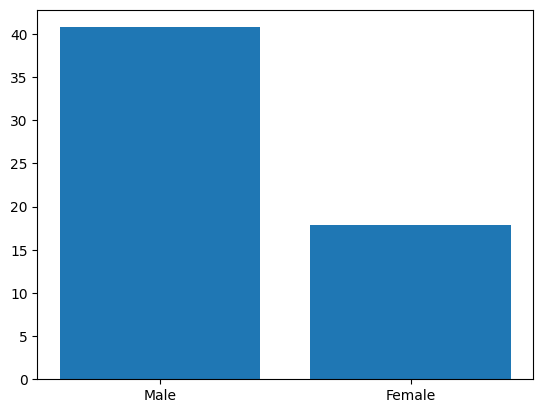

In [ ]:
#### Creating plot from the response given by the OpenAI response
create_plot(output_dict)

Things to read 🇰
1. Few shots learning : https://www.youtube.com/watch?v=J_0qvRt4LNk&ab_channel=SamWitteveen
2. Plot Generation : https://levelup.gitconnected.com/talk-to-your-csv-how-to-visualize-your-data-with-langchain-and-streamlit-5cb8a0db87e0